In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [66]:
df = pd.read_csv('dadosacoes.csv')

In [67]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<Axes: xlabel='nome ação', ylabel='preço ação R$'>

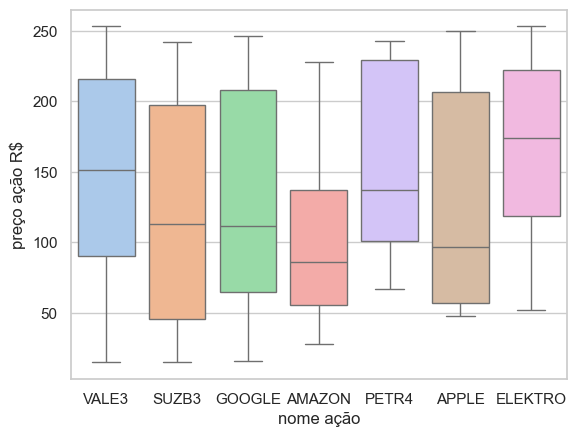

In [ ]:
palette = sns.color_palette("Set2", n_colors=len(df['nome ação'].unique()))

sns.boxplot(x=df['nome ação'], y=df['preço ação R$'], hue=df['nome ação'], palette="pastel", legend=False)

<Axes: xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

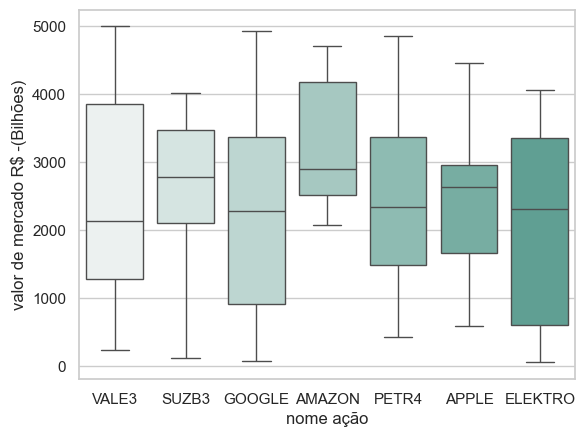

In [96]:
sns.boxplot(
    x=df['nome ação'], 
    y=df['valor de mercado R$ -(Bilhões)'], 
    hue=df['nome ação'], 
    palette="light:#5A9", 
    legend=False
)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [71]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [72]:
df.isnull().sum() # verifica se existe valores vazios na base de dados

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [73]:
df.isna().sum()

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [74]:
# selecionando apenas as colunas numericas do dataframe
col_n = df.select_dtypes(include=['number'])

In [75]:
# Realizando o agrupamento com Kmeans
data_n = pd.get_dummies(df, columns=['nome ação'],drop_first= True)

In [76]:
features = data_n[['preço ação R$','qtde cotas','valor de mercado R$ -(Bilhões)']]

In [77]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
data_n['Cluster'] = kmeans.labels_

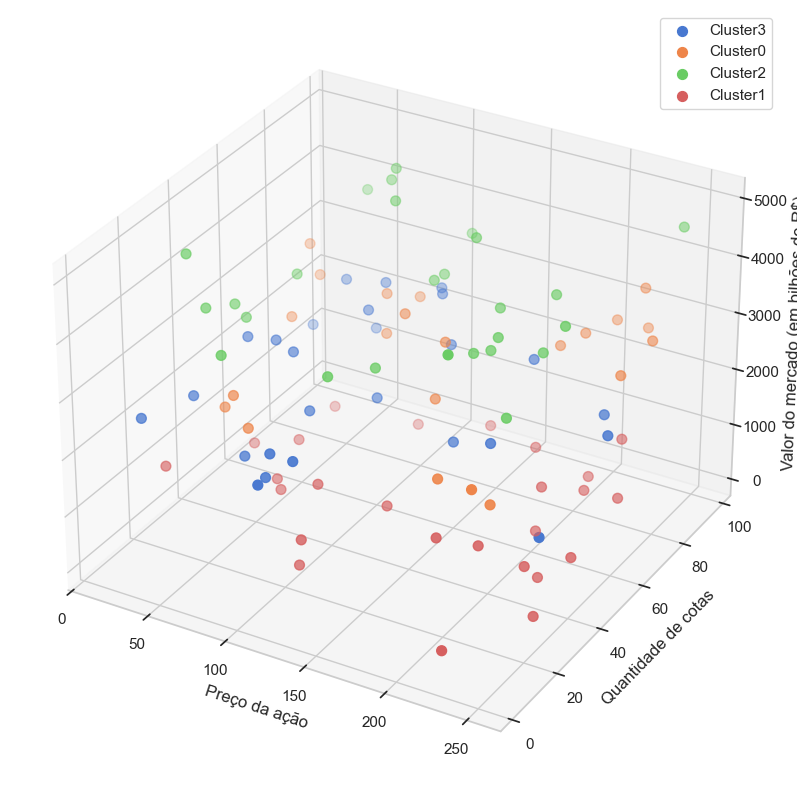

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           153.136364   54.545455                     3020.454545   
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.227273   
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  Cluster_5  \
Cluster                                                                 
0               0.090909         0.181818 

In [91]:
sns.set_theme(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

for cluster in data_n["Cluster"].unique():
    cluster_data = data_n[data_n["Cluster"] == cluster]
    ax.scatter(
        cluster_data["preço ação R$"],
        cluster_data["qtde cotas"],
        cluster_data["valor de mercado R$ -(Bilhões)"],
        label=f"Cluster{cluster}",
        s=50
    )

ax.set_xlabel("Preço da ação")
ax.set_ylabel("Quantidade de cotas")
ax.set_zlabel("Valor do mercado (em bilhões de R$)")

plt.legend()

plt.show()

cluster_means = data_n.groupby("Cluster").mean()
print(cluster_means)


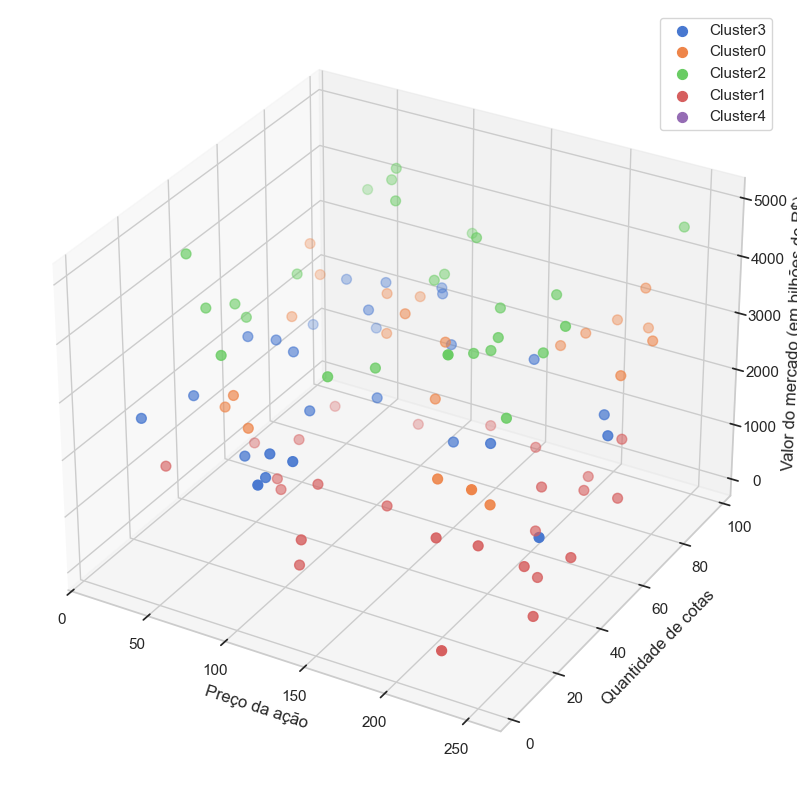

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           153.136364   54.545455                     3020.454545   
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.227273   
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  Cluster_5  \
Cluster                                                                 
0               0.090909         0.181818 

In [89]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(features)
data_n['Cluster_5'] = kmeans.labels_

sns.set_theme(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

for cluster in data_n["Cluster_5"].unique():
    cluster_data = data_n[data_n["Cluster"] == cluster]
    ax.scatter(
        cluster_data["preço ação R$"],
        cluster_data["qtde cotas"],
        cluster_data["valor de mercado R$ -(Bilhões)"],
        label=f"Cluster{cluster}",
        s=50
    )

ax.set_xlabel("Preço da ação")
ax.set_ylabel("Quantidade de cotas")
ax.set_zlabel("Valor do mercado (em bilhões de R$)")

plt.legend()

plt.show()

cluster_means = data_n.groupby("Cluster").mean()
print(cluster_means)


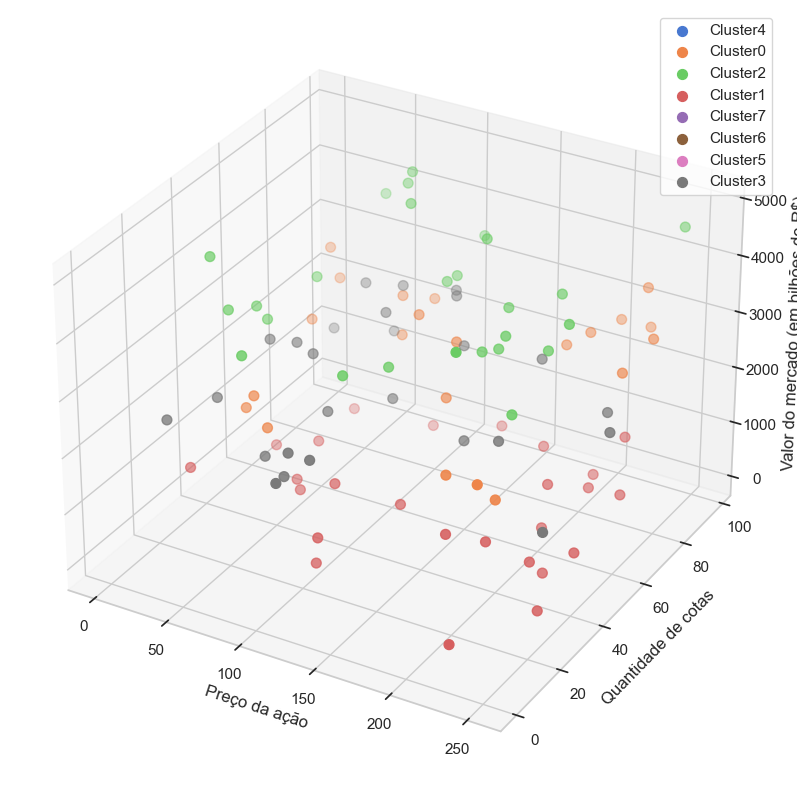

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           153.136364   54.545455                     3020.454545   
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.227273   
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  Cluster_5  \
Cluster                                                                 
0               0.090909         0.181818 

In [90]:
kmeans = KMeans(n_clusters=8,random_state=0).fit(features)
data_n['Cluster_8'] = kmeans.labels_

sns.set_theme(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d", )

for cluster in data_n["Cluster_8"].unique():
    cluster_data = data_n[data_n["Cluster"] == cluster]
    ax.scatter(
        cluster_data["preço ação R$"],
        cluster_data["qtde cotas"],
        cluster_data["valor de mercado R$ -(Bilhões)"],
        label=f"Cluster{cluster}",
        s=50
    )

ax.set_xlabel("Preço da ação")
ax.set_ylabel("Quantidade de cotas")
ax.set_zlabel("Valor do mercado (em bilhões de R$)")

plt.legend()

plt.show()

cluster_means = data_n.groupby("Cluster").mean()
print(cluster_means)


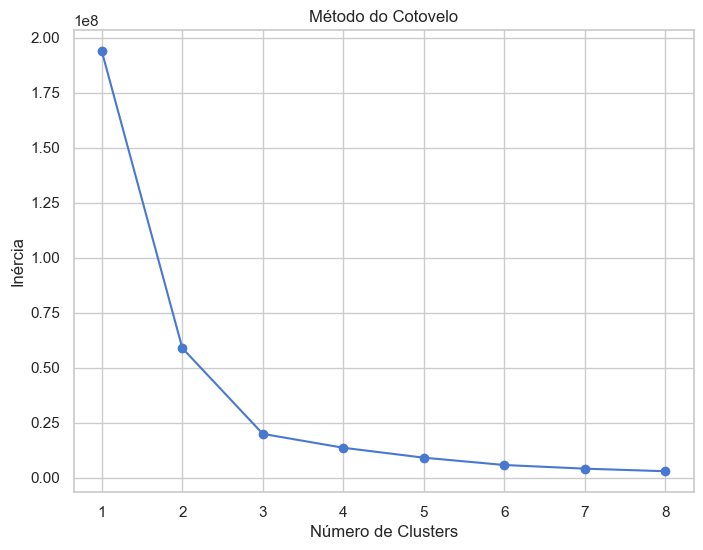

In [81]:
X = data_n[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

inertia = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

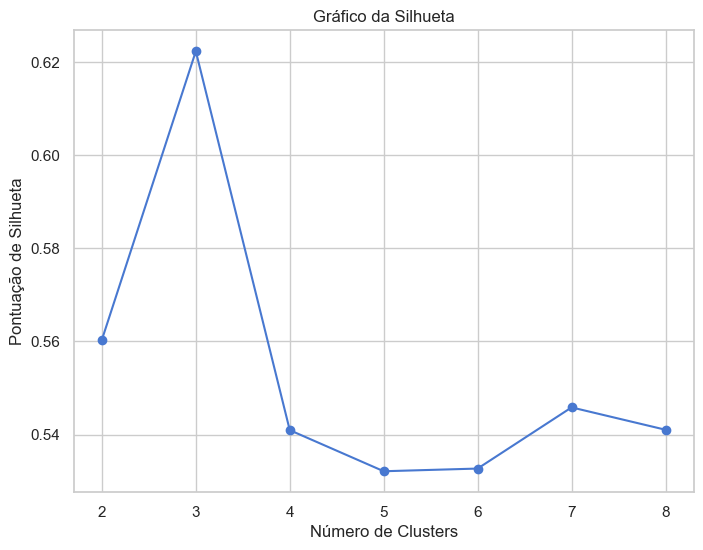

In [82]:
X = data_n[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Gráfico da Silhueta
silhouette_scores = []
for n in range(2, 9):  # Começar de 2 clusters porque a silhueta não faz sentido com 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)  # Calculando o índice de silhueta
    silhouette_scores.append(score)

# Plotando o gráfico da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.show()

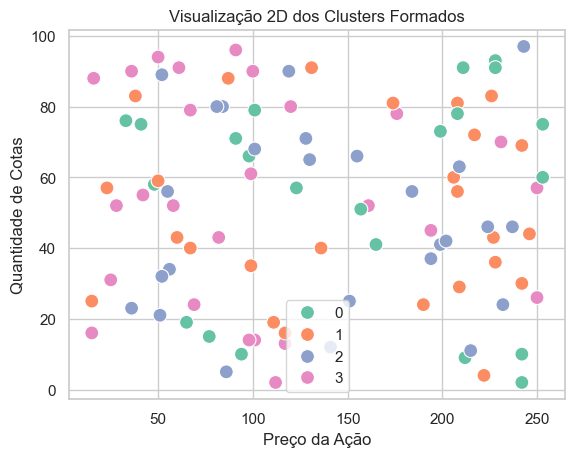

In [83]:
# Visualização 2D dos clusters com o número desejado de clusters
sns.scatterplot(x=data_n['preço ação R$'], y=data_n['qtde cotas'], hue=data_n['Cluster'], palette='Set2', s=100)
plt.title('Visualização 2D dos Clusters Formados')
plt.xlabel('Preço da Ação')
plt.ylabel('Quantidade de Cotas')
plt.legend()
plt.show()

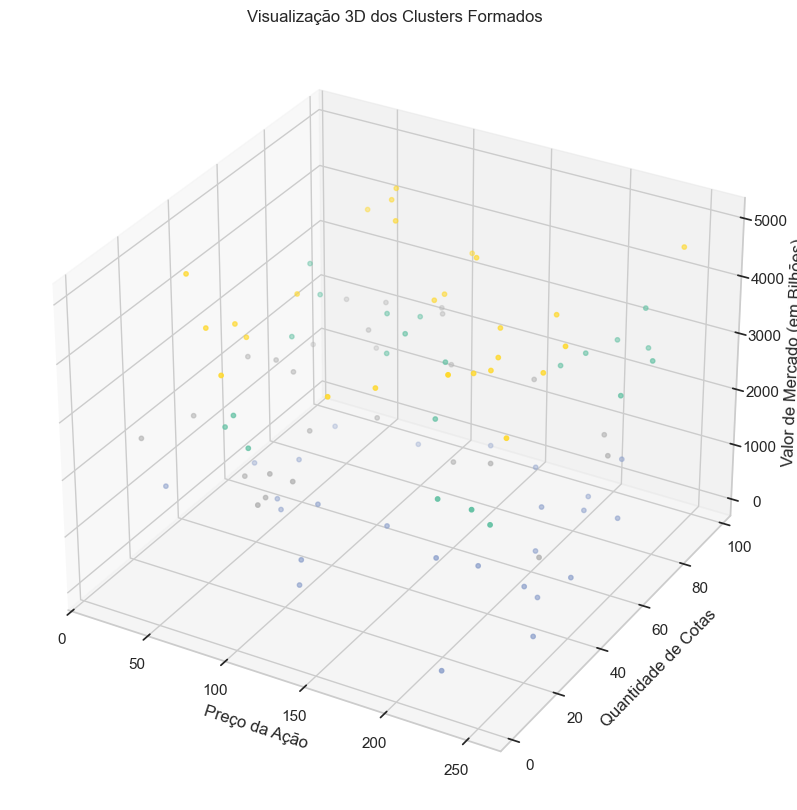

In [86]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_n['preço ação R$'], data_n['qtde cotas'], data_n['valor de mercado R$ -(Bilhões)'],
        c=data_n['Cluster'], cmap='Set2', s=10)
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (em Bilhões)')
plt.title('Visualização 3D dos Clusters Formados')
plt.show()